# 필요 함수

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import time

from sklearn.ensemble import RandomForestClassifier

In [1]:
import pandas as pd
import numpy as np

# 데이터 불러오기
data = pd.read_csv('/Users/chonakyung/modelmodel/SYN.csv')

# Z-점수를 계산하는 함수 정의
def calculate_z_scores(df):
    # 수치형 열 선택
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    z_scores = df[numeric_cols].apply(lambda x: (x - x.mean()) / x.std())
    return z_scores

# Z-점수 계산
z_scores = calculate_z_scores(data)

# 이상치 임계값 설정
threshold = 3

# 이상치 플래그 추가
data['is_anomaly'] = z_scores.abs().max(axis=1) > threshold

# 플래그된 이상치 표시
anomalies = data[data['is_anomaly']]

# 플래그된 이상치를 새로운 CSV 파일로 저장
anomalies.to_csv('/Users/chonakyung/modelmodel/flagged_anomalies.csv', index=False)

# Jupyter Notebook 환경에서 DataFrame을 표시하는 방법
# 주피터 노트북 환경에서 직접 데이터프레임을 표시합니다
anomalies


,Flow Duration,Total Fwd Packets,Total Backward Packets,Flow Packets/s,Flow Bytes/s,Avg Packet Size,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,ECE Flag Count,Fwd Packets Length Total,Bwd Packets Length Total,Flow IAT Mean,Flow IAT Std,Idle Mean,Protocol,is_anomaly
0,0,0,0,0.000000e+00,0.000000e+00,58,0,1,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,TCP,True
200,1571252,0,0,8.800000e-07,6.590909e+07,58,0,1,0,0,1,0,0,0,0,0.000008,0.000011,0.000008,TCP,True
201,1571896,0,0,6.440000e-07,9.006211e+07,58,0,1,0,0,1,0,0,0,0,0.000008,0.000011,0.000008,TCP,True
202,1572465,0,0,5.690000e-07,1.019332e+08,58,0,1,0,0,1,0,0,0,0,0.000008,0.000011,0.000008,TCP,True
203,1573076,0,0,6.110000e-07,9.492635e+07,58,0,1,0,0,1,0,0,0,0,0.000008,0.000011,0.000008,TCP,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,123277444,0,0,1.693693e-02,3.424469e+03,58,0,1,0,0,1,0,0,0,0,0.000037,0.000460,0.000037,TCP,True
3342,130616073,0,0,7.085094e-03,8.186200e+03,58,0,1,0,0,1,0,0,0,0,0.000039,0.000474,0.000039,TCP,True
4139,147424816,0,0,1.749209e-03,3.315784e+04,58,0,1,0,0,1,0,0,0,0,0.000036,0.000427,0.000036,TCP,True
5250,186551176,0,0,1.608607e-02,3.605604e+03,58,0,1,0,0,1,0,0,0,0,0.000036,0.000440,0.000036,TCP,True


---

# 데이터 분석

In [4]:
# CSV 파일 경로
csv_file_path = '/Users/chonakyung/Desktop/capstone/packet/bonk.json'

# CSV 파일 로드
data = pd.read_csv(csv_file_path)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2


In [5]:
import pandas as pd

# Load the JSON file
file_path = '/Users/chonakyung/Desktop/capstone/packet/SYN.json'
data = pd.read_json(file_path)

# Save as CSV
csv_file_path = file_path.replace('.json', '.csv')
data.to_csv(csv_file_path, index=False)

csv_file_path


'/Users/chonakyung/Desktop/capstone/packet/SYN.csv'

## 데이터 분석

In [27]:
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps
0,2024-05-20 12:07:43,08:00:27:e7:02:29,172.25.73.171,172.25.73.172,1,1514,0.000000,0.0,0.000000,NaN,...,1500,NaN,0,NaN,NaN,1500,1500,NaN,NaN,NaN
1,2024-05-20 12:07:43,08:00:27:e7:02:29,172.25.73.171,172.25.73.172,1,1514,0.000017,17297.0,0.000017,NaN,...,1500,NaN,0,NaN,NaN,1500,1500,NaN,NaN,NaN
2,2024-05-20 12:07:43,08:00:27:e7:02:29,172.25.73.171,172.25.73.172,1,1514,0.000024,24278.0,0.000007,NaN,...,1500,NaN,0,NaN,NaN,1500,1500,NaN,NaN,NaN
3,2024-05-20 12:07:43,08:00:27:e7:02:29,172.25.73.171,172.25.73.172,1,1514,0.000031,30579.0,0.000006,NaN,...,1500,NaN,0,NaN,NaN,1500,1500,NaN,NaN,NaN
4,2024-05-20 12:07:43,08:00:27:e7:02:29,172.25.73.171,172.25.73.172,1,1514,0.000038,38493.0,0.000008,NaN,...,1500,NaN,0,NaN,NaN,1500,1500,NaN,NaN,NaN


In [7]:
data.shape

(235, 22)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           235 non-null    object 
 1   switch       235 non-null    object 
 2   src          235 non-null    object 
 3   dst          235 non-null    object 
 4   pktcount     235 non-null    int64  
 5   bytecount    235 non-null    int64  
 6   dur          235 non-null    float64
 7   dur_nsec     235 non-null    float64
 8   tot_dur      235 non-null    float64
 9   flows        235 non-null    int64  
 10  packetins    235 non-null    int64  
 11  pktperflow   235 non-null    int64  
 12  byteperflow  235 non-null    int64  
 13  pktrate      235 non-null    int64  
 14  Pairflow     235 non-null    int64  
 15  Protocol     235 non-null    object 
 16  port_no      235 non-null    int64  
 17  tx_bytes     235 non-null    int64  
 18  rx_bytes     235 non-null    int64  
 19  tx_kbps 

### 데이터 label열에서 고유한 값들을 반환하는 메소드

### 여기서는 공격이 1 정상이 0

In [59]:
data.label.unique()

array([0, 1])

In [60]:
data.label.value_counts()

label
0    63561
1    40784
Name: count, dtype: int64

## 데이터 시각화

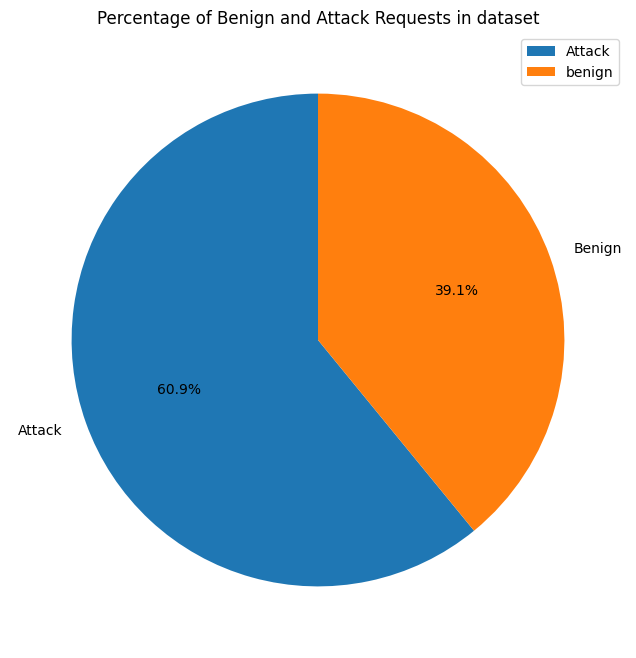

In [61]:
labels = ["Attack","Benign"]
sizes = [dict(data.label.value_counts())[0], dict(data.label.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 90)
plt.legend(["Attack", "benign"])
plt.title('Percentage of Benign and Attack Requests in dataset')
plt.show()

In [10]:
data.describe()

,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps
count,235.0,235.000000,235.000000,2.350000e+02,235.000000,235.000000,235.0,235.000000,235.000000,235.0,235.000000,235.000000,235.000000,235.000000,235.0,235.0,235.0
mean,1.0,466.876596,1.217767,8.106186e+17,0.014301,3.314894,0.0,396.978723,452.876596,0.0,0.612766,27385.591489,452.876596,452.876596,0.0,0.0,0.0
std,0.0,559.285516,1.116103,8.586020e+17,0.093410,2.535810,0.0,561.739510,559.285516,0.0,3.793698,28118.724555,559.285516,559.285516,0.0,0.0,0.0
min,1.0,66.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,52.000000,0.0,0.000000,0.000000,52.000000,52.000000,0.0,0.0,0.0
25%,1.0,66.000000,0.241776,2.181888e+09,0.000031,0.500000,0.0,0.000000,52.000000,0.0,0.000000,443.000000,52.000000,52.000000,0.0,0.0,0.0
50%,1.0,97.000000,0.454336,2.821547e+09,0.000405,4.000000,0.0,0.000000,83.000000,0.0,0.000000,443.000000,83.000000,83.000000,0.0,0.0,0.0
75%,1.0,861.500000,2.574347,1.716174e+18,0.003734,6.000000,0.0,795.500000,847.500000,0.0,0.000000,55384.000000,847.500000,847.500000,0.0,0.0,0.0
max,1.0,1436.000000,2.857787,1.716174e+18,1.343427,10.000000,0.0,1370.000000,1422.000000,0.0,24.000000,58456.000000,1422.000000,1422.000000,0.0,0.0,0.0


## 각 열이 숫자형 데이터를 포함하는지, 텍스트나 범주형 데이터를 포함하는지 확인

In [12]:
numeric_df = data.select_dtypes(include = ['int64', 'float64'])
object_df = data.select_dtypes(include = ['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows',
       'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow',
       'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps'],
      dtype='object') 

Object Columns: 
Index(['dt', 'switch', 'src', 'dst', 'Protocol'], dtype='object') 

Number of Numeric Features:  17
Number of Object Features:  5


## object columns확인

In [13]:
object_df.head()

,dt,switch,src,dst,Protocol
0,2024-05-20 12:05:57,88:fc:5d:3c:3f:b7,172.64.148.154,172.20.104.41,TCP
1,2024-05-20 12:05:57,1c:57:dc:5e:b0:94,172.20.104.41,172.64.148.154,TCP
2,2024-05-20 12:05:57,88:fc:5d:3c:3f:b7,172.64.148.154,172.20.104.41,TCP
3,2024-05-20 12:05:57,1c:57:dc:5e:b0:94,172.20.104.41,172.64.148.154,TCP
4,2024-05-20 12:05:57,1c:57:dc:5e:b0:94,172.20.104.41,172.64.148.154,TCP


Text(0.5, 1.0, 'Number of all requests')

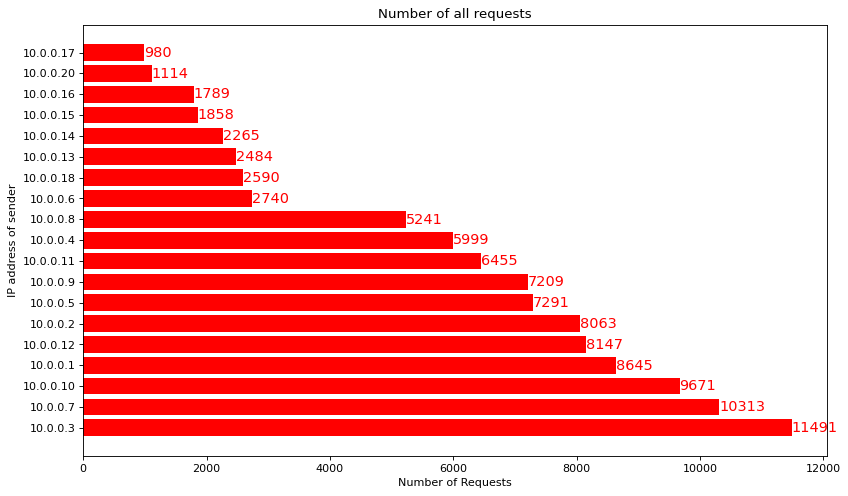

In [65]:
figure(figsize = (12,7), dpi = 80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values() ,color = "red")

for idx, val in enumerate(dict(data.src.value_counts()). values()):
    plt.text(x = val, y = idx - 0.2, s = str(val), color = "r", size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP address of sender')
plt.title('Number of all requests')

Text(0.5, 1.0, 'Number of Attack requests')

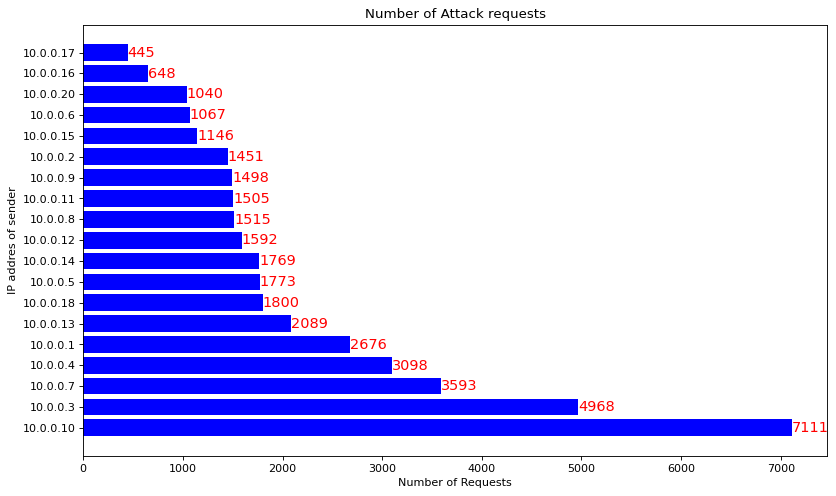

In [66]:
figure(figsize=(12, 7), dpi = 80)
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color = "blue")

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx - 0.2, s = str(val), color = "r", size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of Attack requests')

Text(0.5, 1.0, 'The number of requests from different protocols')

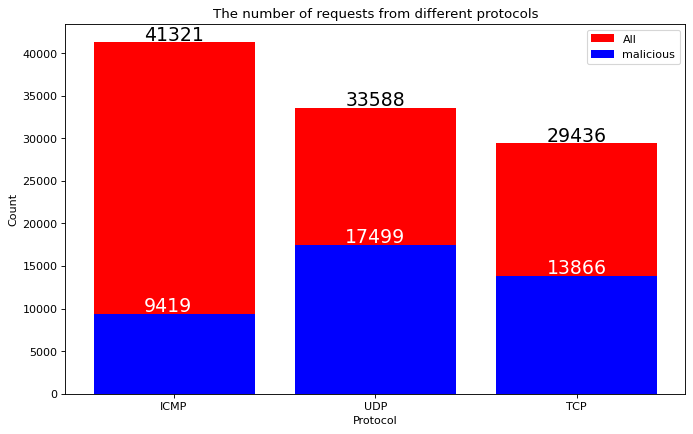

In [67]:
figure(figsize = (10, 6), dpi = 80)
plt.bar(list(dict(data.Protocol.value_counts()).keys()), dict(data.Protocol.value_counts()).values(), color = "r")
plt.bar(list(dict(data[data.label == 1].Protocol.value_counts()).keys()), dict(data[data.label == 1].Protocol.value_counts()).values(), color = "b")

plt.text(x = 0 - 0.15, y = 41321 + 200, s = str(41321), color = 'black', size = 17)
plt.text(x = 1 - 0.15, y = 33588 + 200, s = str(33588), color = 'black', size = 17)
plt.text(x = 2 - 0.15, y = 29436 + 200, s = str(29436), color = 'black', size = 17)

plt.text(x = 0 - 0.15, y = 9419 + 200, s = str(9419), color = 'w', size = 17)
plt.text(x = 1 - 0.15, y = 17499 + 200, s = str(17499), color = 'w', size = 17)
plt.text(x = 2 - 0.15, y = 13866 + 200, s = str(13866), color = 'w', size = 17)

plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(['All', 'malicious'])
plt.title('The number of requests from different protocols')

---

# 모델 정의

## 랜덤 포레스트 모델 생성

- 여러 개의 의사 결정 트리를 사용하여 각 트리의 예측을 평균하거나 다수결로 결정하여 과적합을 줄일 수 있다.
- 높은 성능을 보이고 범주형 및 수치형 데이터를 모두 처리할 수 있다.

In [23]:
class Model:
    global y
    def __init__(self, data, labels):
        self.data = data
        self.y = labels
        X = preprocessing.StandardScaler().fit(self.data).transform(self.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, self.y, random_state = 42, test_size = 0.3)
        self.RF = None

    def RandomForest(self):
        start_time = time.time()
        self.RF = RandomForestClassifier(criterion = 'gini', n_estimators = 500, min_samples_split = 10, max_features = 'sqrt', oob_score = True, random_state = 1, n_jobs =- 1).fit(self.X_train, self.y_train)
       
        predicted_rf = self.RF.predict(self.X_test)
        svm_accuracy = accuracy_score(self.y_test, predicted_rf)
        print(f"Accuracy of RF is : {round(svm_accuracy * 100, 2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test))
        print("########################################################################")
        
        print(" = = %s seconds = = " % (time.time() - start_time))

    def predict(self, sample_data):
        new_data = preprocessing.StandardScaler().fit(self.data).transform(sample_data)

        predicted_labels = self.RF.predict(new_data)

        return predicted_labels

---

# 학습

## 데이터 전처리

### 데이터프레임에서 누락된 값을 삭제하는 과정
- data.copy() => 원본 데이터에 영향을 주지 않으면서 작업하기 위해

- data.dropna() => 데이터프레임에서 누락된 값을 삭제(결측치가 있는 행이나 열을 삭제하여 데이터의 완전성을 유지하고 머신 러닝 모델을 훈련시킬 때 오류를 방지)

In [11]:
df = data.copy()
df = df.dropna()

### 입력 특성과 타겟 특성 분리

In [14]:
X = df.drop(['dt', 'src', 'dst'], axis = 1)
#y = df.label

### 데이터프레임 내의 범주형 변수를 이진 더미 변수로 변환

In [50]:
X = pd.get_dummies(X)

## 학습

In [72]:
M = Model(X)
M.RandomForest()

Accuracy of RF is : 99.99% 

########################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18984
           1       1.00      1.00      1.00     12168

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152

########################################################################
 = = 4.364753007888794 seconds = = 


---

# 테스트

In [16]:
import random
import pandas as pd
from joblib import load

# 데이터 로드
df = pd.read_csv('/Users/chonakyung/Desktop/capstone/packet_analysis.csv')

# 랜덤 샘플링
num = 10
random_indices = random.sample(range(len(df)), num)
test_data = df.iloc[random_indices]

# 테스트 데이터 전처리
X_test_my = test_data.drop(['dt', 'src', 'dst'], axis=1)
# y_test_my = test_data['label']

X_test_my = pd.get_dummies(X_test_my)

# 모델 로드
model_path = '/Users/chonakyung/Desktop/capstone/packet/Classification_model (1).joblib'
loaded_model = load(model_path)

# 필요한 열을 모델이 기대하는 순서로 정렬하고 누락된 열을 추가
expected_columns = ['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 
                    'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 
                    'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']

missing_cols = set(expected_columns) - set(X_test_my.columns)
for col in missing_cols:
    X_test_my[col] = 0

X_test_my = X_test_my.reindex(columns=expected_columns, fill_value=0)

# X_test_my의 정보 출력
X_test_my_info = X_test_my.info()

# 열 목록 출력
X_test_my_columns = X_test_my.columns.tolist()

# 모델을 사용하여 예측을 수행
predicted_labels = loaded_model.predict(X_test_my)

# 예측 결과를 출력
print("Predicted labels for new data:")
print(predicted_labels)


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 125 to 133
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           10 non-null     int64  
 1   switch       10 non-null     int64  
 2   src          10 non-null     int64  
 3   dst          10 non-null     int64  
 4   pktcount     10 non-null     int64  
 5   bytecount    10 non-null     int64  
 6   dur          10 non-null     float64
 7   dur_nsec     10 non-null     float64
 8   tot_dur      10 non-null     float64
 9   flows        10 non-null     int64  
 10  packetins    10 non-null     int64  
 11  pktperflow   10 non-null     int64  
 12  byteperflow  10 non-null     int64  
 13  pktrate      10 non-null     int64  
 14  Pairflow     10 non-null     int64  
 15  Protocol     10 non-null     int64  
 16  port_no      10 non-null     int64  
 17  tx_bytes     10 non-null     int64  
 18  rx_bytes     10 non-null     int64  
 19  tx_kbps     

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [78]:
import random
import pandas as pd
from joblib import load

# 데이터 로드
df = pd.read_csv('/Users/chonakyung/Desktop/capstone/packet_analysis.csv')

# 랜덤 샘플링
num = 10
random_indices = random.sample(range(len(df)), num)
test_data = df.iloc[random_indices]

# 테스트 데이터 전처리
X_test_my = test_data.drop(['dt', 'src', 'dst'], axis=1)
# y_test_my = test_data['label']

# 원-핫 인코딩 수행
X_test_my = pd.get_dummies(X_test_my)

# 모델 로드
model_path = '/Users/chonakyung/Desktop/capstone/Classification_model (1).joblib'
loaded_model = load(model_path)

# 모델이 기대하는 모든 열을 확인
preprocessor = loaded_model.named_steps['preprocessor']
categorical_transformer = preprocessor.transformers_[0]
numerical_transformer = preprocessor.transformers_[1]

categorical_features = categorical_transformer[2]
numerical_features = numerical_transformer[2]

expected_columns = list(categorical_features) + list(numerical_features)

# 필요한 열을 모델이 기대하는 순서로 정렬하고 누락된 열을 추가
missing_cols = set(expected_columns) - set(X_test_my.columns)
for col in missing_cols:
    X_test_my[col] = 0

X_test_my = X_test_my.reindex(columns=expected_columns, fill_value=0)

# 모든 열을 float 타입으로 변환
X_test_my = X_test_my.astype(float)

# X_test_my의 정보 출력
X_test_my_info = X_test_my.info()

# 열 목록 출력
X_test_my_columns = X_test_my.columns.tolist()

# 모델을 사용하여 예측을 수행
predicted_labels = loaded_model.predict(X_test_my)

# 예측 결과를 출력
print("Predicted labels for new data:")
print(predicted_labels)


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 793 to 728
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   switch       10 non-null     float64
 1   dst          10 non-null     float64
 2   Protocol     10 non-null     float64
 3   Pairflow     10 non-null     float64
 4   bytecount    10 non-null     float64
 5   byteperflow  10 non-null     float64
 6   dt           10 non-null     float64
 7   dur          10 non-null     float64
 8   dur_nsec     10 non-null     float64
 9   flows        10 non-null     float64
 10  packetins    2 non-null      float64
 11  pktcount     10 non-null     float64
 12  pktperflow   10 non-null     float64
 13  pktrate      1 non-null      float64
 14  port_no      10 non-null     float64
 15  rx_bytes     10 non-null     float64
 16  rx_kbps      1 non-null      float64
 17  tot_dur      10 non-null     float64
 18  tot_kbps     1 non-null      float64
 19  tx_bytes    

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [18]:
from joblib import load

loaded_model = load('/Users/chonakyung/Desktop/capstone/packet/Classification_model (1).joblib')

predictions = loaded_model.predict(X_test_my)

print(predictions)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [21]:
# 모델 파일을 로드합니다.
loaded_model = load('/Users/chonakyung/Desktop/capstone/packet/Classification_model (1).joblib')

# 예측에 사용할 데이터를 준비합니다.
X_test_my = pd.get_dummies(X_test_my)

# 모델을 사용하여 예측을 수행합니다.
predicted_labels = loaded_model.predict(X_test_my)

# 예측 결과를 출력합니다.
print("Predicted labels for new data:")
print(predicted_labels)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [20]:
print(X_test_my.columns)


Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps'],
      dtype='object')


In [60]:
import random
import pandas as pd

# 데이터 로드
df = pd.read_csv('/Users/chonakyung/Desktop/capstone/packet_analysis.csv')

# 랜덤 샘플링
num = 10
random_indices = random.sample(range(len(df)), num)
test_data = df.iloc[random_indices]

# 테스트 데이터 전처리
X_test_my = test_data.drop(['dt', 'src', 'dst'], axis=1)
# y_test_my = test_data['label']
X_test_my = pd.get_dummies(X_test_my)

# 모델이 기대하는 모든 열을 확인
# 예제에서 예상 열을 임의로 설정
# 실제 환경에서는 모델을 로드하여 확인해야 함
expected_columns = ['pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 
                    'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 
                    'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 
                    'rx_kbps', 'tot_kbps']

# 필요한 열을 모델이 기대하는 순서로 정렬하고 누락된 열을 추가
missing_cols = set(expected_columns) - set(X_test_my.columns)
for col in missing_cols:
    X_test_my[col] = 0

X_test_my = X_test_my.reindex(columns=expected_columns, fill_value=0)

# X_test_my의 정보 출력
X_test_my_info = X_test_my.info()

# 열 목록 출력
X_test_my_columns = X_test_my.columns.tolist()

X_test_my_info, X_test_my_columns


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 84 to 52
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pktcount     10 non-null     int64  
 1   bytecount    10 non-null     int64  
 2   dur          10 non-null     float64
 3   dur_nsec     10 non-null     float64
 4   tot_dur      10 non-null     float64
 5   flows        10 non-null     float64
 6   packetins    1 non-null      float64
 7   pktperflow   10 non-null     float64
 8   byteperflow  10 non-null     int64  
 9   pktrate      1 non-null      float64
 10  Pairflow     10 non-null     int64  
 11  Protocol     10 non-null     int64  
 12  port_no      10 non-null     float64
 13  tx_bytes     10 non-null     int64  
 14  rx_bytes     10 non-null     int64  
 15  tx_kbps      1 non-null      float64
 16  rx_kbps      1 non-null      float64
 17  tot_kbps     1 non-null      float64
dtypes: float64(11), int64(7)
memory usage: 1.5 KB


(None,
 ['pktcount',
  'bytecount',
  'dur',
  'dur_nsec',
  'tot_dur',
  'flows',
  'packetins',
  'pktperflow',
  'byteperflow',
  'pktrate',
  'Pairflow',
  'Protocol',
  'port_no',
  'tx_bytes',
  'rx_bytes',
  'tx_kbps',
  'rx_kbps',
  'tot_kbps'])

In [22]:
import pandas as pd
from joblib import load, dump
import time
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

class Model:
    global y
    def __init__(self, data, labels):
        self.data = data
        self.y = labels
        X = preprocessing.StandardScaler().fit(self.data).transform(self.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, self.y, random_state = 42, test_size = 0.3)
        self.RF = None

    def RandomForest(self):
        start_time = time.time()
        self.RF = RandomForestClassifier(criterion = 'gini', n_estimators = 500, min_samples_split = 10, max_features = 'sqrt', oob_score = True, random_state = 1, n_jobs =- 1).fit(self.X_train, self.y_train)
       
        predicted_rf = self.RF.predict(self.X_test)
        svm_accuracy = accuracy_score(self.y_test, predicted_rf)
        print(f"Accuracy of RF is : {round(svm_accuracy * 100, 2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test))
        print("########################################################################")
        
        print(" = = %s seconds = = " % (time.time() - start_time))

    def predict(self, sample_data):
        new_data = preprocessing.StandardScaler().fit(self.data).transform(sample_data)

        predicted_labels = self.RF.predict(new_data)

        return predicted_labels

# 저장된 모델 불러오기
loaded_model = load('/Users/chonakyung/Desktop/capstone/Classification_model (1).joblib')

# 데이터 불러오기
data = pd.read_json('/Users/chonakyung/Desktop/capstone/packet/ping of death.json').fillna(0)
df = data.dropna()

# 예측할 데이터에서의 특성 이름 확인
test_feature_names = df.drop(['dt', 'src', 'dst'], axis=1).columns

# 모델이 학습할 때 사용된 특성 이름 확인
training_feature_names = loaded_model.data.columns

# 누락된 특성 이름 확인
missing_features = set(training_feature_names) - set(test_feature_names)

# 누락된 특성들을 추가하여 데이터프레임 업데이트
for feature in missing_features:
    df[feature] = 0  # 적절한 값으로 대체할 필요가 있습니다.

# 예측할 데이터 준비
X_test_my = df.drop(['dt', 'src', 'dst'], axis=1)
X_test_my = pd.get_dummies(X_test_my)

# 중복된 레이블을 가진 열 제거
X_test_my = X_test_my.loc[:,~X_test_my.columns.duplicated()]

# 예측할 데이터에서 'switch_50:ed:3c:2d:9e:9f' 특성을 'switch'로 변경
X_test_my.rename(columns={'switch_50:ed:3c:2d:9e:9f': 'switch'}, inplace=True)
# 예측할 데이터의 열 순서를 학습할 때 사용된 순서와 동일하게 만들기
X_test_my = X_test_my.reindex(columns=training_feature_names)

# 예측 수행
predictions = loaded_model.predict(X_test_my)

print(predictions)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/chonakyung/Desktop/capstone/Classification_model (1).joblib'